**ДЗ сделано не полностью.**

---



---



In [79]:
# ДЗ постараюсь доделать к 01.09.20

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

1. **Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

In [53]:
y = np.random.uniform(0,1,10)
y[1] = 0
y[5] = 1
# Создадим фунцию, которая будет вычитать 1e-10 если элемент = 1, и заменять элемент равный нулю на 1e-10.
def del_zerro(x):
    y_pred =[]
    for i in x:
        if i == 0:
            i = 1e-10
        elif i == 1:
            i = 1-1e-10
        y_pred.append(i)
    return y_pred

# Добавим функцию del_zerro в функцию calc_logloss

def calc_logloss(y, y_pre_pred):
    y_pred = np.array([del_zerro(y_pre_pred)])
    print(y_pred)
    return -np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


[0.04653315 0.         0.53713717 0.99406139 0.3418572  1.
 0.92785646 0.22678512 0.90949535 0.3087583 ]


In [54]:
# Пример применения del_zerro

del_zerro(y)


[0.04653314549887255,
 1e-10,
 0.5371371747903995,
 0.994061389106813,
 0.3418571973749954,
 0.9999999999,
 0.9278564568689937,
 0.22678512489336677,
 0.9094953483967315,
 0.3087583015894353]

In [55]:
# Пример применения calc_logloss (для теста возмем только y!!!)

calc_logloss(y, y)

[[4.65331455e-02 1.00000000e-10 5.37137175e-01 9.94061389e-01
  3.41857197e-01 1.00000000e+00 9.27856457e-01 2.26785125e-01
  9.09495348e-01 3.08758302e-01]]


0.3273506368819819

**2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**


In [56]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [57]:
def eval_model(X, y, iterations, alpha=1e-3):
    i_eval=[]
    err_eval = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 100) == 0:
            i_eval.append(i)
            err_eval.append(err)
  
    plt.axis(ymax=50, xmax=400)
    plt.grid(True)
    plt.suptitle('sgd_model')
    plt.axis(ymax = 2, xmax = 300)

    return plt.scatter(i_eval, err_eval, label=alpha)

In [58]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res


In [59]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])


Выходные данные были обрезаны до нескольких последних строк (5000).
[[0.67061282 0.71412308 0.88554061 0.69279652 0.89919394 0.8308011
  0.93964345 0.59599449 0.65922087 0.90901344]]
[[3.20110231e-01 3.58942195e-01 3.21862065e-01 3.39255936e-01
  1.79033606e-01 7.09086332e-01 4.42587762e-02 7.04565729e-05
  3.10754990e-01 3.70844903e-01]]
[[0.6702169  0.7133111  0.88605906 0.69218261 0.89891139 0.83017266
  0.93994812 0.59525374 0.65894083 0.90921154]]
[[3.20012144e-01 3.58335548e-01 3.23505136e-01 3.38909903e-01
  1.79034110e-01 7.08287414e-01 4.46964159e-02 7.08469810e-05
  3.10775542e-01 3.71961884e-01]]
[[0.66984464 0.71251266 0.88657067 0.69158732 0.89861908 0.82954004
  0.94024302 0.594542   0.65868697 0.90940169]]
[[3.19927786e-01 3.57736007e-01 3.25124817e-01 3.38574342e-01
  1.79005152e-01 7.07480306e-01 4.51247916e-02 7.12274809e-05
  3.10811419e-01 3.73040690e-01]]
[[0.66949446 0.71172716 0.88707556 0.69100957 0.89831782 0.82890377
  0.94052874 0.59385737 0.65845742 0.909584

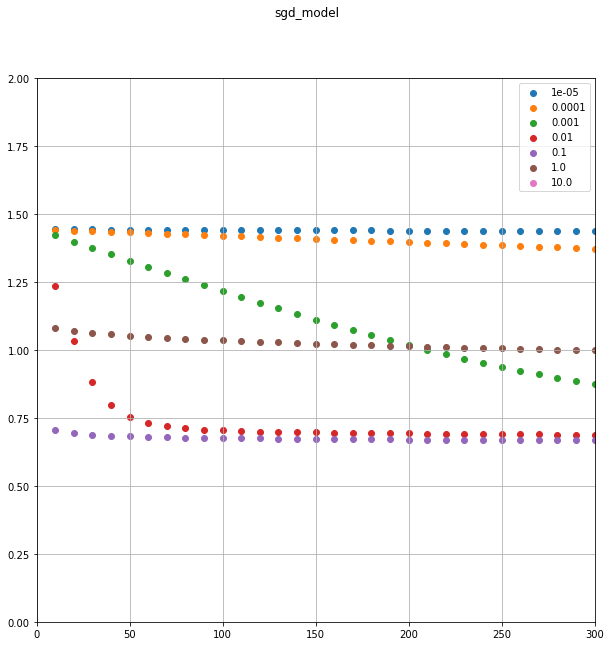

In [60]:
# В цикле посмотри при каких альфа log loss будет минимальным.
plt.figure(figsize=(10,10))
alpha = 1e-5
while alpha < 100:
  W = eval_model(X_st, y, iterations=1000, alpha=alpha)
  alpha *= 10

plt.legend()

При alpha = 0.01 функция показывает оптимальный результат


**3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).**

In [61]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    # if i % (iterations / 10) == 0:
    #     print(i, W, err)
    return W

In [62]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-5)
def calc_pred_proba(W, X):
  return sigmoid(np.dot(W,X))
calc_pred_proba(W, X)

[[0.77678197 0.81967624 0.95100063 0.79908464 0.97730047 0.85643521
  0.9937923  0.99364588 0.76498816 0.9644164 ]]
[[0.77677806 0.81967283 0.95099861 0.79908097 0.97729917 0.85643397
  0.99379173 0.99364487 0.76498414 0.96441489]]
[[0.77677416 0.81966942 0.95099658 0.79907731 0.97729787 0.85643273
  0.99379116 0.99364386 0.76498011 0.96441337]]
[[0.77677025 0.81966601 0.95099456 0.79907365 0.97729657 0.85643149
  0.99379059 0.99364285 0.76497609 0.96441186]]
[[0.77676635 0.8196626  0.95099253 0.79906999 0.97729527 0.85643025
  0.99379002 0.99364184 0.76497206 0.96441034]]
[[0.77676244 0.81965919 0.95099051 0.79906633 0.97729397 0.85642901
  0.99378945 0.99364083 0.76496804 0.96440883]]
[[0.77675853 0.81965578 0.95098848 0.79906267 0.97729267 0.85642776
  0.99378888 0.99363982 0.76496401 0.96440731]]
[[0.77675463 0.81965236 0.95098646 0.79905901 0.97729137 0.85642652
  0.99378831 0.99363881 0.76495999 0.9644058 ]]
[[0.77675072 0.81964895 0.95098443 0.79905535 0.97729006 0.85642528
  0.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).**

In [63]:
# ФУНКЦИЯ В РАБОТЕ
def calc_pred(W,X):
  return 

5. **Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.**

In [64]:
y = np.array([np.random.randint(0, 2) for i in range(20)])
y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [65]:
y_pred = np.array([np.random.randint(0,2) for i in range(20)])
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [66]:
mae = y_pred-y
mae

array([ 1,  0,  0,  0,  1,  1,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0,
        0,  0, -1])

In [68]:
# В условном mae мы можем получить отрицательное число (-1) в том случае, если мы предсказали False (0), а на самом деле True (1) => FN = -1. 
# Если мы предсказали True (1), а на самом деле False (0), то условный mae = 1 => FP. В остальных случаях mae будет = 0 и такой подход не подойдет.
FN = 0
FP = 0
for i in mae:
  if i == -1:
    FN += 1
  elif i == 1:
    FP += 1

FN, FP



(4, 3)

In [69]:
# Можно пройти в цикле и посмотреть совпадают ли значние
TP = 0
TN = 0
for i in range(len(y)):
  if y_pred[i] == y[i] and y[i]==0:
    TN += 1
  if y_pred[i] == y[i] and y[i]==1:
    TP +=1
TP, TN

# Можно еще рассмотреть вариант умножения значений: если при умножения значений получим 1, то TP, если получится значение 0, при равенстве предсказанного значения и реального, то TN


(8, 5)

In [70]:
matrix = [[TP, FP], [FN, TN]]
matrix

[[8, 3], [4, 5]]

In [72]:
accuracy = (TP+TN)/len(y)
accuracy

0.65

In [73]:
precision = TP/(TP+FP)
precision

0.7272727272727273

In [74]:
recall = TP/(TP+FN)
recall

0.6666666666666666

In [75]:
F_score = 2*precision*recall/(recall+precision)
F_score


0.6956521739130435

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

(0.0, 1.0)

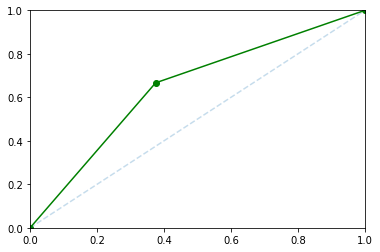

In [77]:
fpr, tpr, _ = roc_curve(y, y_pred)
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.xlim(0,1)
plt.ylim(0,1)